# Part 1


We will expand the squares, and rebuild the quadratic in terms of $\theta$ for the following expression
$$
\begin{align*}
\exp\left(-\frac{1}{2}  \left(\tau+n\phi\right) \left(\theta - \frac{1}{\tau+n\phi }\left(\tau\theta_0+\phi\sum _{i=1}^{n}x_{i}\right)\right)^2   \right)
\end{align*}$$

Since this expression is a pdf of normal distribution, we can denote that,

$$ \mu=\frac{1}{\tau+n\phi }\left(\tau\theta_0+\phi\sum _{i=1}^{n}x_{i}\right) $$

Then, we can re-express the equation and expand it 
$$
\begin{align*}
 \left(\theta - \frac{1}{\tau+n\phi }\left(\tau\theta_0+\phi\sum _{i=1}^{n}x_{i}\right)\right)^2 
 &=  \left(\theta - \mu \right)^2\\
 &= \theta^2-2 \theta \mu+\mu^2\\
 &= \theta^2-2 \theta \frac{\tau \theta_0+\phi \sum_{i=1}^n x_i}{\tau+n \phi}+\left(\frac{\tau \theta_0+\phi \sum_{i=1}^n x_i}{\tau+n \phi}\right)^2 \\
\end{align*}$$

Next, we multiplying by $-\frac{1}{2}(\tau+n \phi)$,
$$
-\frac{1}{2}(\tau+n \phi) \theta^2+\left(\tau \theta_0+\phi \sum_{i=1}^n x_i\right) \theta-\frac{1}{2}\left(\tau \theta_0+\phi \sum_{i=1}^n x_i\right)^2\left(\frac{1}{\tau+n \phi}\right)
$$

Now, the expression is in a quadratic form, and we can re-write the original expression into:

$$
\exp\left(-\frac{1}{2}(\tau+n \phi) \theta^2+\left(\tau \theta_0+\phi \sum_{i=1}^n x_i\right) \theta-\frac{1}{2}\left(\frac{1}{\tau+n \phi}\right)\left(\tau \theta_0+\phi \sum_{i=1}^n x_i\right)^2\right)
$$


# Part 2
1. 

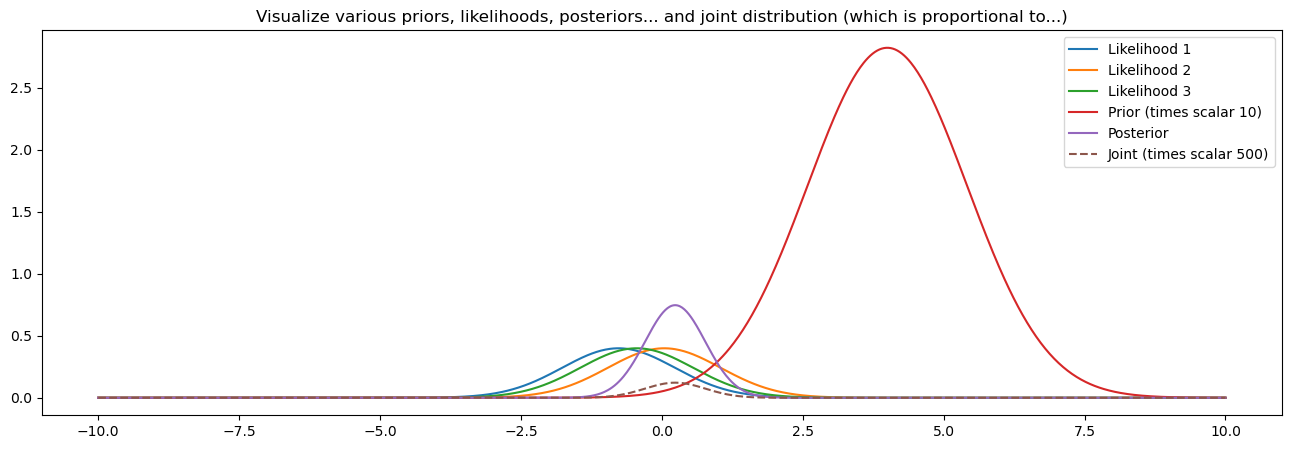

likelihoods:  [-0.76810086  0.04204019 -0.44618346]


In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Given parameters for the Bayesian analysis
n = 3
x = stats.norm(loc=0, scale=1).rvs(n)
theta_0, tau = 4, 1/2
parameter_domain = np.linspace(-10, 10, 1001)

# Likelihood calculation for each observation
likelihoods = [stats.norm.pdf(parameter_domain, loc=xi, scale=1) for xi in x]

# Prior distribution
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)

# Joint distribution 
joint = 500 * np.prod(likelihoods, axis=0) * prior

# Posterior distribution
posterior = stats.norm(loc=(tau*theta_0 + x.sum()) / (tau + n), scale=1 / (tau + n)**0.5).pdf(parameter_domain)


plt.figure(figsize=(16, 5))
# Plot individual likelihoods for each observation
for i, individual_likelihood in enumerate(likelihoods):
    plt.plot(parameter_domain, individual_likelihood, label=f"Likelihood {i+1}")

# Plot other distributions
plt.plot(parameter_domain, 10*prior, label="Prior (times scalar 10)")
plt.plot(parameter_domain, posterior, label="Posterior")
plt.plot(parameter_domain, joint, linestyle="--", label="Joint (times scalar 500)")

plt.legend()
plt.title("Visualize various priors, likelihoods, posteriors... and joint distribution (which is proportional to...)")
plt.show()

print("likelihoods: ",x)

2.

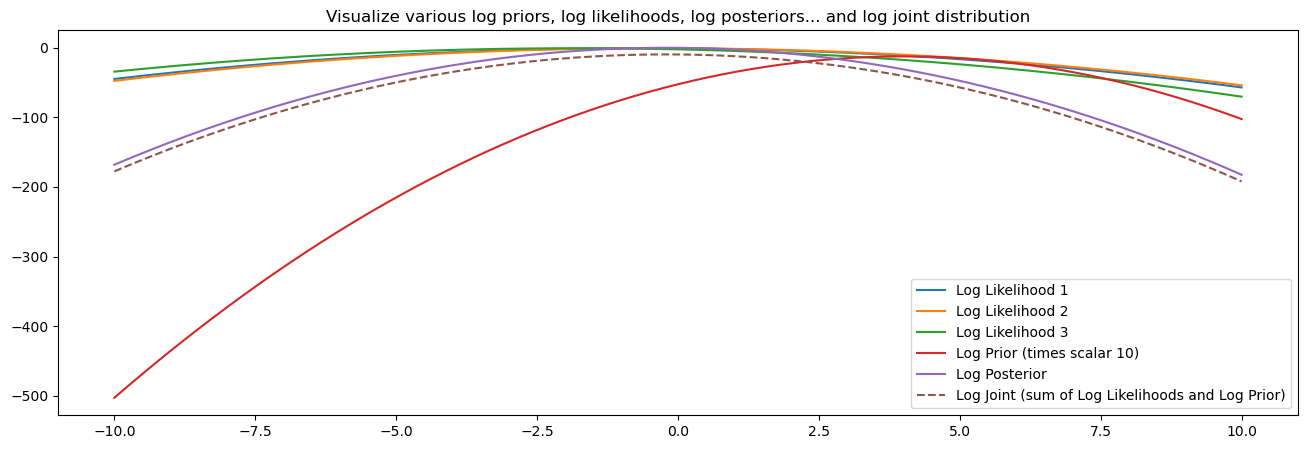

In [14]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# parameters 
n = 3
x = stats.norm(loc=0, scale=1).rvs(n)
theta_0, tau = 4, 1/2
parameter_domain = np.linspace(-10, 10, 1001)

# Log likelihood calculation for each observation
log_likelihoods = [stats.norm.logpdf(parameter_domain, loc=xi, scale=1) for xi in x]

# Log prior distribution
log_prior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain)

# Log joint distribution 
log_joint = np.sum(log_likelihoods, axis=0) + log_prior

# Log posterior distribution
log_posterior = stats.norm(loc=(tau*theta_0 + x.sum()) / (tau + n), scale=1 / (tau + n)**0.5).logpdf(parameter_domain)

plt.figure(figsize=(16, 5))
# Plot individual log likelihoods for each observation
for i, individual_log_likelihood in enumerate(log_likelihoods):
    plt.plot(parameter_domain, individual_log_likelihood, label=f"Log Likelihood {i+1}")

plt.plot(parameter_domain, 10*log_prior, label="Log Prior (times scalar 10)")
plt.plot(parameter_domain, log_posterior, label="Log Posterior")
plt.plot(parameter_domain, log_joint, linestyle="--", label="Log Joint (sum of Log Likelihoods and Log Prior)")

plt.legend()
plt.title("Visualize various log priors, log likelihoods, log posteriors... and log joint distribution")
plt.show()


3.

First of all, we know that the likelihood of normal distribution is 

$$
p(x \mid \theta, \phi)=\prod_{i=1}^n \sqrt{\frac{\phi}{2 \pi}} e^{-\frac{\phi}{2}\left(x_i-\theta\right)^2}
$$

Now, we are given a prior such that $p(\theta) \propto 1$, so we can find the posterior distribution from the joint  distribution: 

$$
\begin{align*}
p(\theta \mid x) &= p(x|\theta)p(\theta)\\
                 &\propto \prod_{i=1}^n \sqrt{\frac{\phi}{2 \pi}} e^{-\frac{\phi}{2}\left(x_i-\theta\right)^2}\\
                 &= \left(\sqrt{\frac{\phi}{2 \pi}} e^{-\frac{\phi}{2}\left(x_1-\theta\right)^2}\right) \times \left(\sqrt{\frac{\phi}{2 \pi}} e^{-\frac{\phi}{2}\left(x_2-\theta\right)^2}\right) \times \ldots \times \left(\sqrt{\frac{\phi}{2 \pi}} e^{-\frac{\phi}{2}\left(x_n-\theta\right)^2}\right)\\
                 &= (\sqrt{\frac{\phi}{2 \pi}})^{n} e^{-\frac{\phi}{2} \sum_{i=1}^n\left(x_i-\theta\right)^2}\\
\end{align*}
$$

Since $(\sqrt{\frac{\phi}{2 \pi}})^{n}$ is a constant, we can simplify further:

$$
p(\theta \mid x) \propto e^{-\frac{\phi}{2} \sum_{i=1}^n\left(x_i-\theta\right)^2}
$$

Next, by expanding the component, we get,

$$
\begin{align*}
-\frac{\phi}{2}\sum_{i=1}^n\left(x_i-\theta\right)^2 &=-\frac{\phi}{2}[n \bar{x}^2-2 n \bar{x} \theta+n \theta^2]\\
&= -\frac{\phi}{2}\left[n\left(\theta^2-2 \bar{x} \theta+\bar{x}^2\right)\right]\\
&=-\frac{\phi}{2} n(\theta-\bar{x})^2
\end{align*}
$$

Therefore, we can conclude that:

$$
\theta \mid x \sim \mathcal{N}\left(\bar{x}, \sigma^2 / n\right)
$$

Where the posterior mean is the sample mean $\bar{x}$, and the posterior variance $\sigma^2 / n$, where n is the sample size and $\sigma^2$ is the variance associated with the likelihood function.

4.

Log likelihoods remain consistent, unaffected by the choice of prior, whether it's improper or proper. They're determined by the data and the model parameters. However, posterior distribution comes from multiplying the likelihood and the prior. If an improper prior is used, it might lead to an improper posterior, lacking the characteristics of a valid probability distribution. However, if the likelihood contains enough information, it can outweigh the influence of the improper prior, potentially resulting in a valid posterior.
